# House price prediction case study

# Problem Statement

A US based housing company called Surprise Housing has decided to enter the Australian market. The company uses data analytics to buy homes for less than the actual price  and resell them for a higher price. For the same purpose, the company  collected a data set  of Australian home sales. 
 This company is looking for potential purchases to enter the market. To predict the actual value of potential properties and decide whether to invest in them, we need to build a regression model using regularization.

The company wants to know the following  about  prospective properties: 
 What are the variables that are important in predicting the price of a house, and how well do these variables explain the price of the house? . 
 Also determine the optimal lambda value  for ridge and lasso regression.

# Business goals

We need to model house prices using the available independent variables. This model is used by  management to understand exactly how prices change with variables. You can steer the company's strategy accordingly  and focus on areas that generate high returns. In addition, models are a good way for management to understand price movements in new markets.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# Step 1: Loading and cleaning Data

In [3]:
#Loading the data using pandas
df=pd.read_csv(r"D:\Data Science\Machine Learning II\train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#.shape code gives the dimensions
df.shape

(1460, 81)

This implies that the dataset have 1460 rows and 81 columns

In [7]:
# describe() gives numerical description of the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
# checking for duplicate values
sum(df.duplicated(subset = 'Id')) == 0

True

# It implies there are duplicates in the dataset

In [9]:
# Checking for percentage of null values
round(100*(df.isnull().sum()/len(df.index)), 2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [10]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [11]:
# Function to remove outliers
def drop_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [12]:
# grouping columns having high null values together as there are multiple columns with high nulls
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# As per the given data dictionary, the null values in these columns indicates the absence of facility which may affect the house price

# So these variables we can impute with 'none'

In [13]:
#imputing variables with none
high_nulls = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in high_nulls:
    df[i].fillna("none", inplace=True)

In [14]:
# Checking for null values again
df.columns[df.isnull().any()] 

null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

# Analysing each of these columns seperately:-


In [15]:

df['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [17]:
df['MasVnrArea'].describe()


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

# According to the data dictionary "LotFrontage" is Linear feet of street connected to property. Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values


In [19]:
# According to the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)


In [21]:
# Checking the columns once again after imputation
df['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
df['GarageYrBlt'].describe()


count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [23]:
df['MasVnrArea'].describe()


count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [25]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

# Step 2: Exploratory Data Analysis

In [26]:
# Checking for numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

From the given numeric data we can drop id column as it is having no significance 

In [28]:
# dropping id column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

# Now we can compare the target variable Sales Price with selected other variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

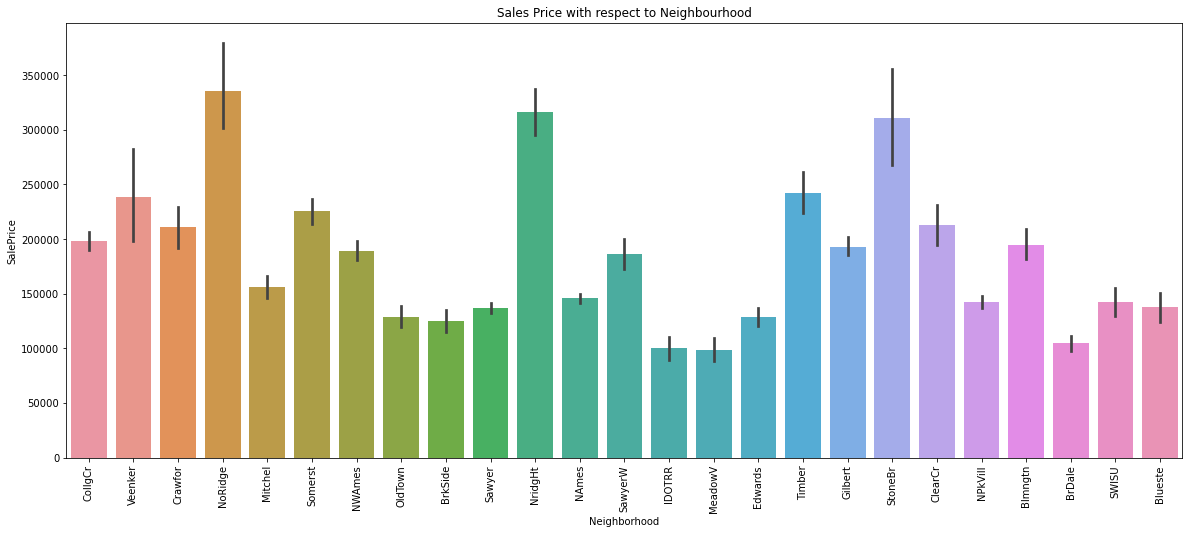

In [29]:
#plotting sales price with respect to neighborhood

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

# From the graph we can understand some of the properties in neighborhood is having high price.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

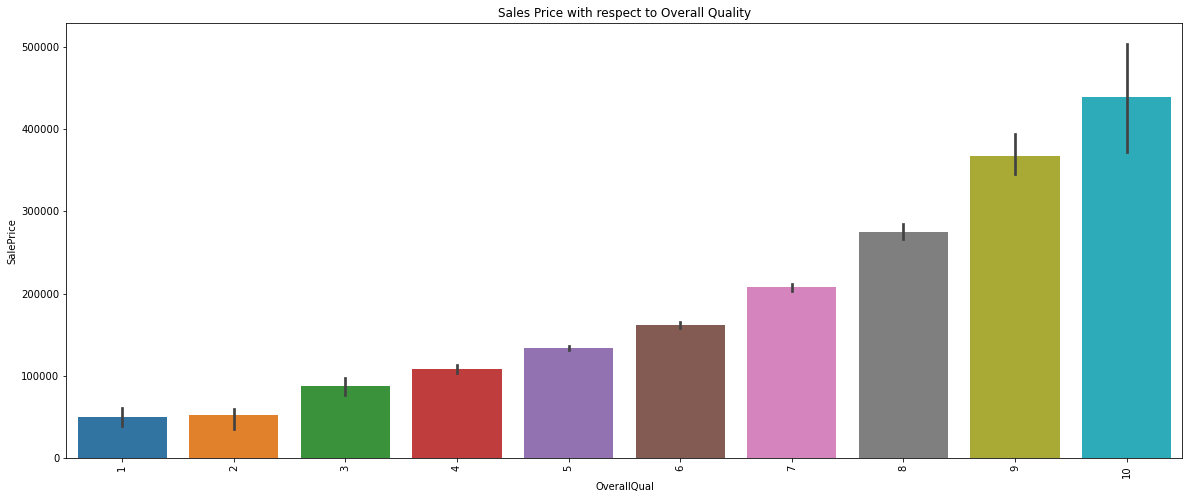

In [30]:
#Plotting relation between overall quality and sales price
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

# From the graph it is understood that as the overall quality increases sales price also increases

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

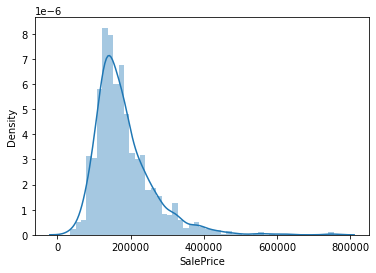

In [31]:
sns.distplot(df['SalePrice'])


In [33]:
df_raw = df.copy

# From the  figure it is observed that Saleprice figures are skewed towards left, so we will apply the log transformation to obtain a centralized data


In [34]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

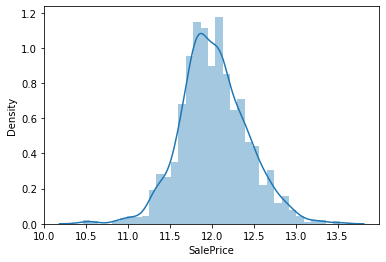

In [35]:
sns.distplot(df['SalePrice'])

# Checking correlation

In [36]:
cor = df_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

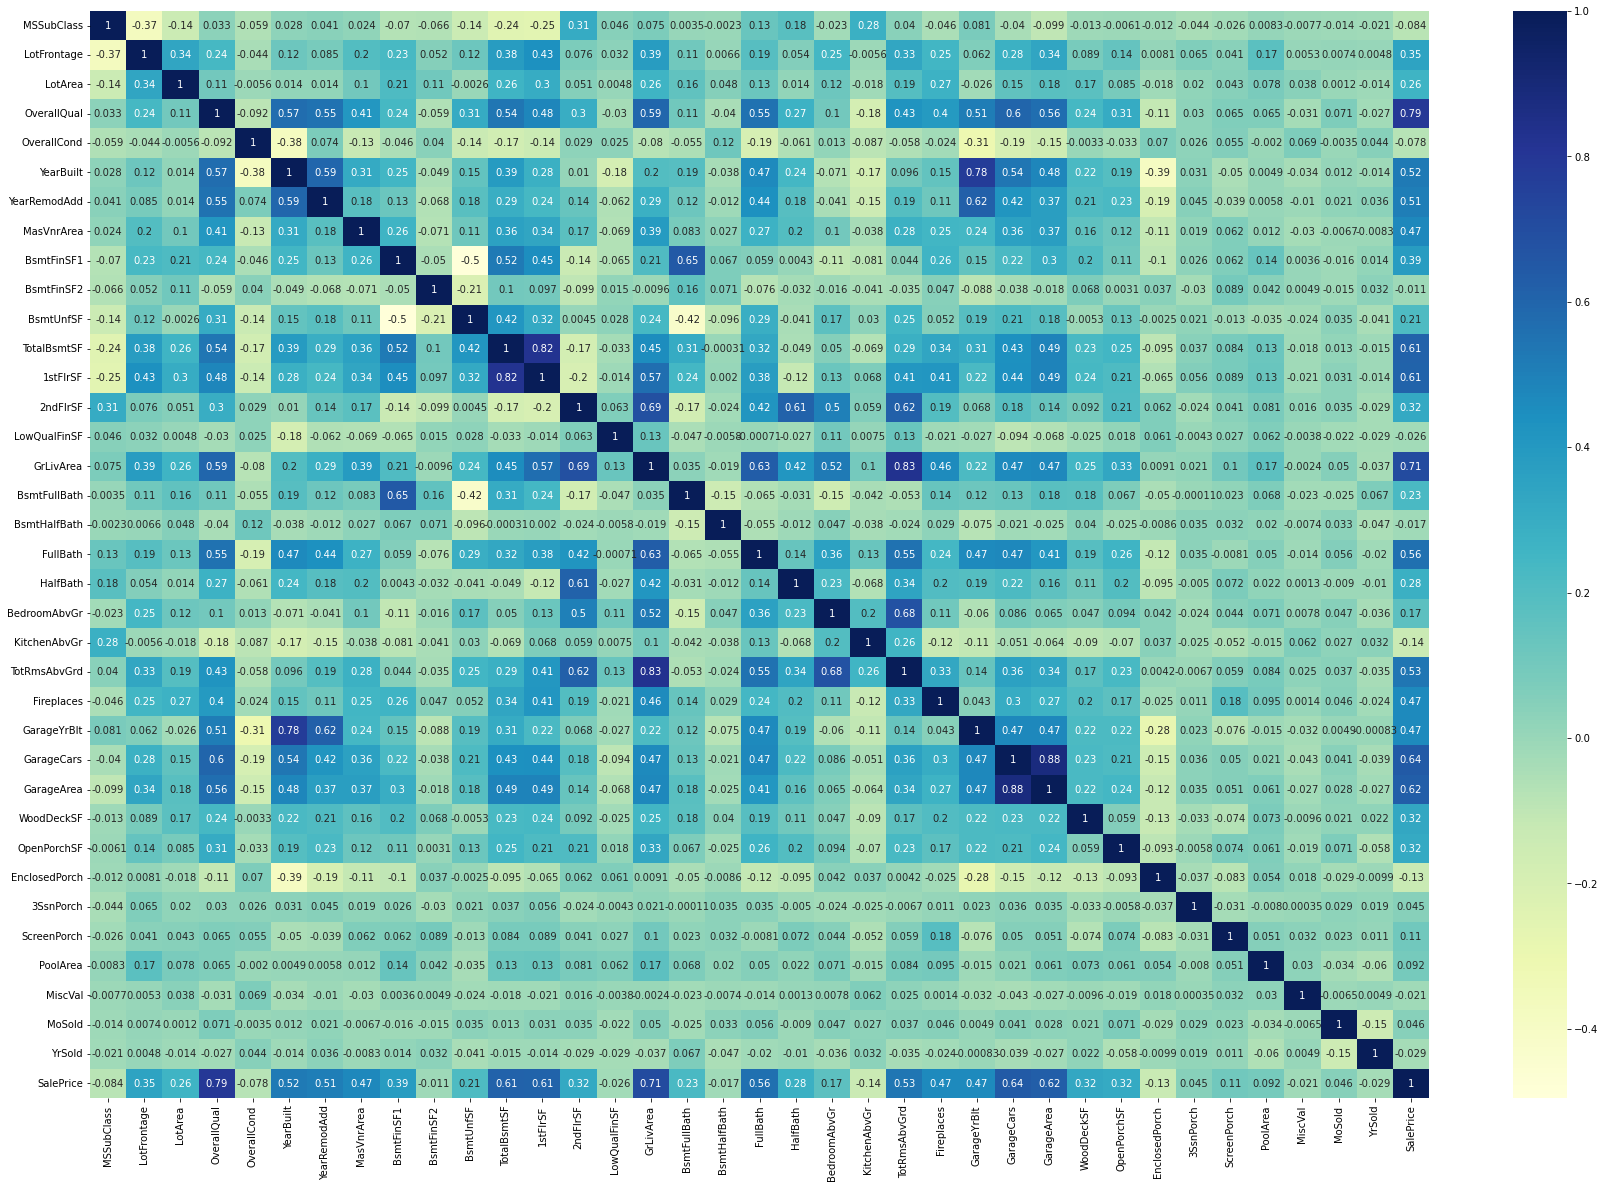

In [37]:
#plotting correlations using heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### From the graph it is observed that some of the variables are correlated.
### Will first check for predictive power before dropping

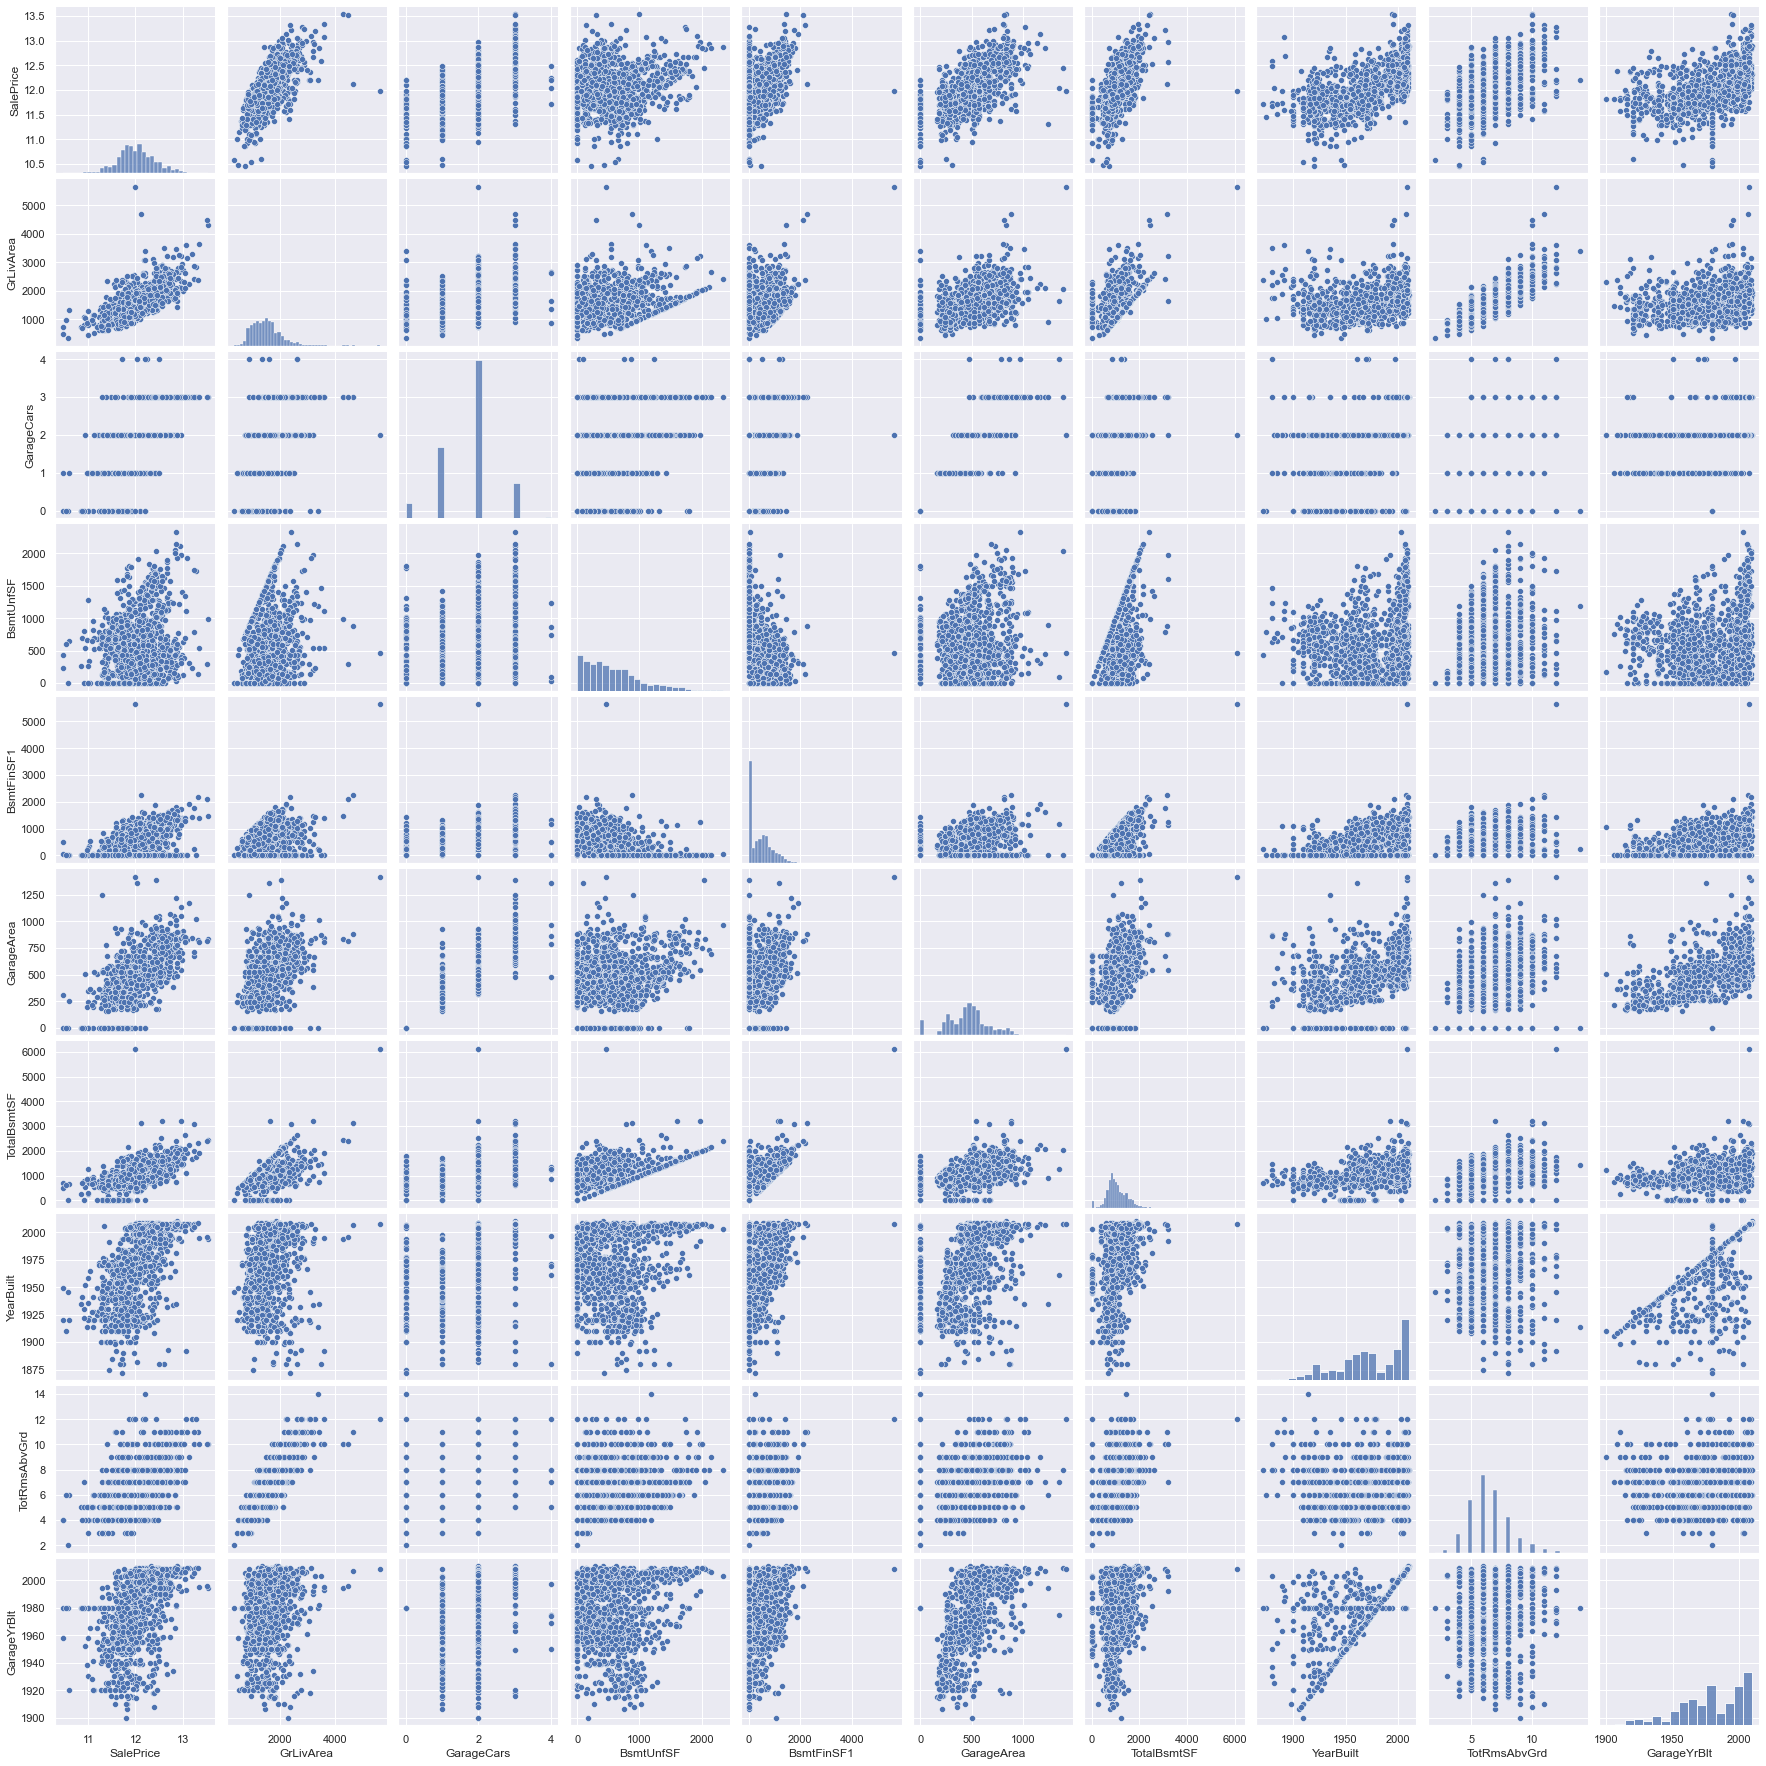

In [38]:
# Checking using pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Dropping columns that are correlated and not contributing to 'SalePrice'

In [39]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   none  none        none       0      2   
1         Lvl    AllPub  ...        0   none  none        none       0      5   
2         Lvl    AllPub  ...        0   none  none        none       0      9   
3         Lvl    AllPub  ...        0   none  none        none       0      2   
4         Lvl    AllPub  ...        0   none  none        none       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247699  
1   2007        WD         Normal  12.109016  
2   2008        WD         Normal  12.317171  
3   2006        WD        Abnorml  11.849405  
4   2008        WD         Normal  12.429220  

[5 rows x 77 columns]

In [40]:
# Checking numeric columns
df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1460 rows x 34 columns]

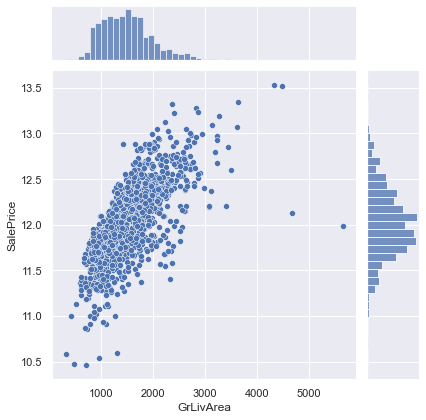

In [41]:
# Analysing important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()


In [43]:
# Removing outliers on lower right side of 'GrLivArea'
df = drop_outliers(df,'GrLivArea')

In [44]:
# Checking shape of data again
df.shape

(1429, 77)

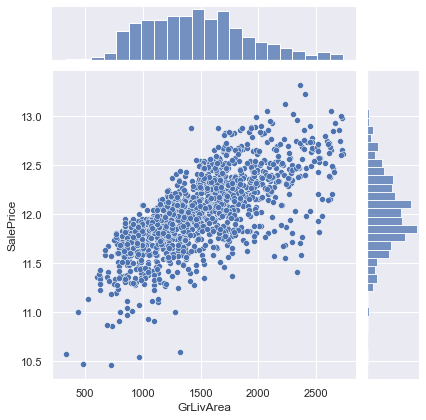

In [45]:
# plotting GeLivArea vs SalePrice after removing outliers
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

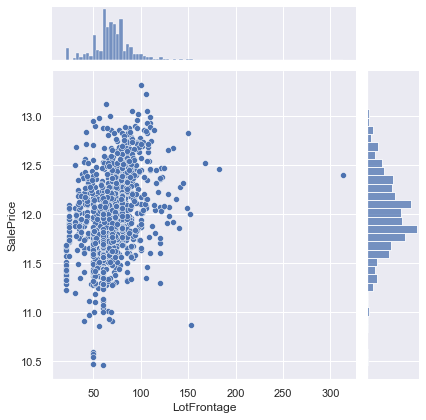

In [46]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

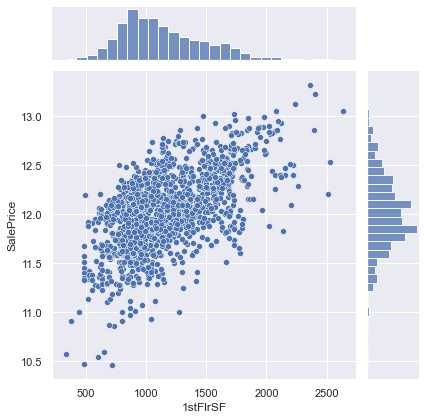

In [47]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

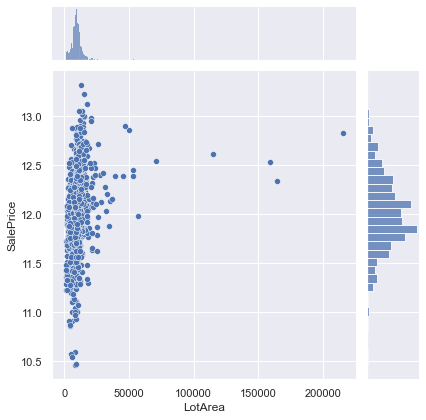

In [48]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

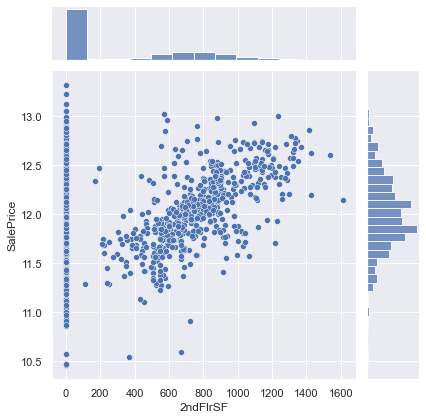

In [49]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

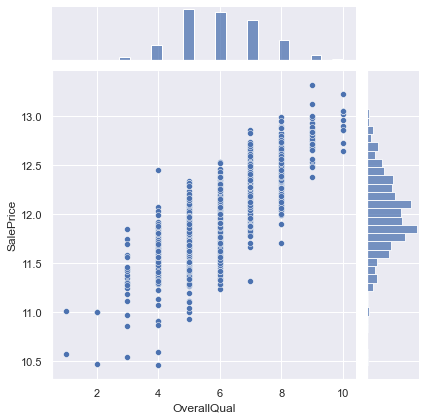

In [50]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

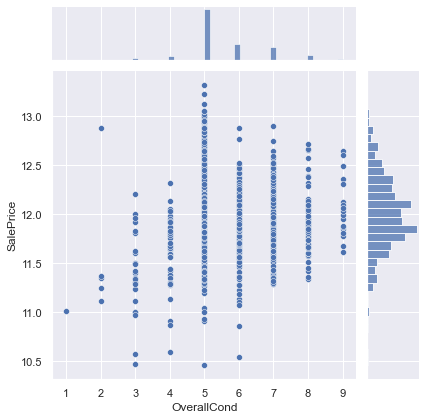

In [51]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

### Ground floor houses Sq.Ft has also a steady increase

### Deriving column for property's age

In [53]:
df['AgeProp'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   none  none        none       0      2   2008   
1         Lvl    AllPub  ...   none  none        none       0      5   2007   
2         Lvl    AllPub  ...   none  none        none       0      9   2008   
3         Lvl    AllPub  ...   none  none        none       0      2   2006   
4         Lvl    AllPub  ...   none  none        none       0     12   2008   

  SaleType  SaleCondition  SalePrice  AgeProp  
0       WD         Normal  12.247699        5  
1       WD         Normal  12.109016       31  
2       WD         Normal  12.317171        7  
3       WD        Abnorml  11.849405       91  
4       WD         Normal  12.429220        8  

[5 rows x 78 columns]

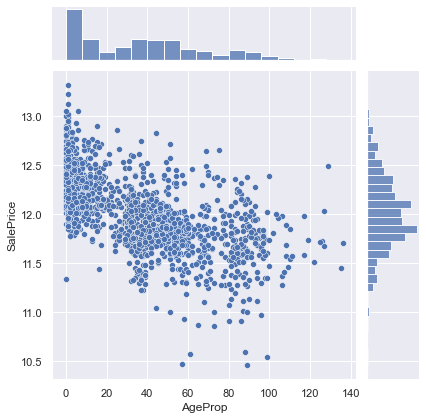

In [54]:
# AgeProp vs SalePrice
sns.jointplot(x = df['AgeProp'], y = df['SalePrice'])
plt.show()

### From the graph it is observed that as the age of the property increases sale price of the property decreases.So only new properties will get high sale price

### Dropping the columns Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [55]:
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   none  none        none   
1         Lvl    AllPub  ...           0        0   none  none        none   
2         Lvl    AllPub  ...           0        0   none  none        none   
3         Lvl    AllPub  ...           0        0   none  none        none   
4         Lvl    AllPub  ...           0        0   none  none        none   

  MiscVal SaleType  SaleCondition  SalePrice AgeProp  
0       0       WD         Normal  12.247699       5  
1       0       WD         Normal  12.109016      31  
2       0       WD         Normal  12.317171       7  
3       0       WD        Abnorml  11.849405      91  
4       0       WD         Normal  12.429220       8  

[5 rows x 74 columns]

In [56]:
df.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [57]:
df.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [58]:
# Dropping columns having low variance and thus are not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)


In [59]:
# Checking variance of these columns
l2= df.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  GarageArea  \
0          196.0         706           0          856  ...         548   
1            0.0         978           0         1262  ...         460   
2          162.0         486           0          920  ...         608   
3            0.0         216           0          756  ...         642   
4          350.0         655           0         1145  ...         836   
...          ...         ...         ...          ...  ...         ...   
1455         0.0           0           0          953  ...         460   
1456       119.0         790         163         1542  ...         500   
1457         0.0         275           0         1152  ...         252   
1458         0.0          49        1029         1078  ...         240   
1459         0.0         830         290         1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  SalePrice  AgeProp  
0            0        0  12.247699        5  
1            0        0  12.109016       31  
2            0        0  12.317171        7  
3            0        0  11.849405       91  
4            0        0  12.429220        8  
...        ...      ...        ...      ...  
1455         0        0  12.072547        8  
1456         0        0  12.254868       32  
1457         0     2500  12.493133       69  
1458         0        0  11.864469       60  
1459         0        0  11.901590       43  

[1429 rows x 31 columns]

In [60]:
for i in l2:
    print(df[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

### Few Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.


In [61]:
df.shape

(1429, 72)

# Step 3: Data Preparation

In [62]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450  none      Reg         Lvl   
1          20       RL         80.0     9600  none      Reg         Lvl   
2          60       RL         68.0    11250  none      IR1         Lvl   
3          70       RL         60.0     9550  none      IR1         Lvl   
4          60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... ScreenPorch PoolArea PoolQC Fence  \
0    Inside       Gtl      CollgCr  ...           0        0   none  none   
1       FR2       Gtl      Veenker  ...           0        0   none  none   
2    Inside       Gtl      CollgCr  ...           0        0   none  none   
3    Corner       Gtl      Crawfor  ...           0        0   none  none   
4       FR2       Gtl      NoRidge  ...           0        0   none  none   

   MiscFeature  MiscVal SaleType SaleCondition  SalePrice AgeProp  
0         none        0       WD        Normal  12.247699       5  
1         none        0       WD        Normal  12.109016      31  
2         none        0       WD        Normal  12.317171       7  
3         none        0       WD       Abnorml  11.849405      91  
4         none        0       WD        Normal  12.429220       8  

[5 rows x 71 columns]

In [63]:
# checking data type
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [64]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     41
int64      27
float64     3
Name: 0, dtype: int64

In [65]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeProp']


In [66]:
#we should convert categorical_columns to a list to make it easier to work with
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Creation of dummy columns for converting categorical to numerical


In [67]:
df = pd.get_dummies(df, drop_first=True )
df.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 248 columns]

In [68]:
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 247 columns]

In [69]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [70]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)


In [71]:
from sklearn.preprocessing import StandardScaler


In [74]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeProp']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeProp']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeProp']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeProp']])

In [75]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
11      1.323938   -0.300737     0.345478  0.113320  ...               0   
1070    0.360916   -0.300737     0.030191 -0.267693  ...               0   
513    -0.223442   -0.300737     0.119563 -0.176705  ...               0   
467    -0.106571   -0.300737    -0.764234 -0.722635  ...               0   
993    -1.008820   -0.300737    -0.709617 -1.115022  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
11                 0             1             0            0   
1070               0             0             0            1   
513                0             0             0            1   
467                0             0             0            1   
993                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
11                        0                     0                     0   
1070                      0                     0                     0   
513                       0                     0                     0   
467                       0                     0                     0   
993                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
1070                     1                      0  
513                      1                      0  
467                      1                      0  
993                      0                      1  

[5 rows x 247 columns]

In [76]:
X_test.head()


MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  ...   
335    -0.606456    1.881258    0.620602     1.075768  1.258064  ...   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718  ...   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  ...   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
461                0               0             0             0            1   
335                0               0             0             0            1   
200                0               0             0             0            1   
214                0               0             0             0            1   
1003               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
461                       0                     0                     0   
335                       0                     0                     0   
200                       0                     0                     0   
214                       0                     0                     0   
1003                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
461                      1                      0  
335                      1                      0  
200                      1                      0  
214                      1                      0  
1003                     1                      0  

[5 rows x 247 columns]

# Step 3: Model Building and Evaluation

## Checking model using linear regression and RFE

In [77]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [78]:
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [79]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 65),
 ('LotFrontage', False, 115),
 ('LotArea', False, 39),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('MasVnrArea', False, 135),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 112),
 ('TotalBsmtSF', False, 13),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 97),
 ('BsmtHalfBath', False, 136),
 ('FullBath', False, 109),
 ('HalfBath', False, 90),
 ('BedroomAbvGr', False, 130),
 ('KitchenAbvGr', False, 102),
 ('Fireplaces', False, 133),
 ('GarageArea', False, 44),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 139),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 126),
 ('ScreenPorch', False, 73),
 ('PoolArea', False, 8),
 ('MiscVal', False, 141),
 ('AgeProp', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_Pave', False, 75),
 ('Alley_none', False, 119),
 ('LotShape_IR2', False, 116),

In [80]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col


Index(['OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'AgeProp', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',

In [81]:
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_none',
       'SaleType_CWD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=147)

In [82]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [83]:
X_train_rfe = pd.DataFrame(X_train[col])

In [84]:
X_train_rfe.head()


OverallQual  BsmtFinSF1  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
11       2.241710    1.323938  0.113320  1.995226     -0.111211   1.923409   
1070    -0.764271    0.360916 -0.267693 -0.769750     -0.111211  -0.932170   
513     -0.012775   -0.223442 -0.176705 -0.769750     -0.111211  -0.860557   
467     -0.764271   -0.106571 -0.722635  1.060654     -0.111211   0.401627   
993     -0.012775   -1.008820 -1.115022  1.046127     -0.111211   0.079368   

       AgeProp  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  GarageCond_TA  \
11   -1.209026            0            0            1  ...              1   
1070  0.445587            0            0            1  ...              1   
513  -0.447904            0            0            1  ...              1   
467   0.908879            0            0            1  ...              1   
993  -1.209026            0            0            1  ...              1   

      GarageCond_none  PoolQC_Gd  PoolQC_none  SaleType_Con  SaleType_ConLD  \
11                  0          0            1             0               0   
1070                0          0            1             0               0   
513                 0          0            1             0               0   
467                 0          0            1             0               0   
993                 0          0            1             0               0   

      SaleType_ConLI  SaleCondition_AdjLand  SaleCondition_Normal  \
11                 0                      0                     0   
1070               0                      0                     1   
513                0                      0                     1   
467                0                      0                     1   
993                0                      0                     0   

      SaleCondition_Partial  
11                        1  
1070                      0  
513                       0  
467                       0  
993                       1  

[5 rows x 100 columns]

In [85]:
X_train_rfe.shape

(1000, 100)

In [86]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9462094780462628

In [88]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.896947371080699

#### We will use some alternate methods of regression

In [89]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 65),
 ('LotFrontage', False, 115),
 ('LotArea', False, 39),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('MasVnrArea', False, 135),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 112),
 ('TotalBsmtSF', False, 13),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 97),
 ('BsmtHalfBath', False, 136),
 ('FullBath', False, 109),
 ('HalfBath', False, 90),
 ('BedroomAbvGr', False, 130),
 ('KitchenAbvGr', False, 102),
 ('Fireplaces', False, 133),
 ('GarageArea', False, 44),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 139),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 126),
 ('ScreenPorch', False, 73),
 ('PoolArea', False, 8),
 ('MiscVal', False, 141),
 ('AgeProp', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_Pave', False, 75),
 ('Alley_none', False, 119),
 ('LotShape_IR2', False, 116),

In [90]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'AgeProp', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',

In [91]:
X_test_rfe = X_test[col1]

In [92]:
X_test_rfe.head()


OverallQual  BsmtFinSF1  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
461      0.620334   -0.211663 -1.556925  0.506037      -0.09698  -0.813247   
335     -0.825989    1.881258  1.258064 -0.435654      -0.09698   0.616745   
200     -1.549150   -1.026482 -0.084718 -0.835813      -0.09698  -0.843999   
214     -0.102827   -0.146477 -1.249541  0.848688      -0.09698  -0.248718   
1003    -0.825989   -1.026482  1.422541 -0.835813      -0.09698   0.383905   

       AgeProp  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  GarageCond_TA  \
461   1.326790            0            0            1  ...              1   
335   0.303675            0            0            1  ...              1   
200  -0.924063            0            0            0  ...              1   
214  -0.037363            0            0            1  ...              1   
1003 -0.105571            0            0            1  ...              1   

      GarageCond_none  PoolQC_Gd  PoolQC_none  SaleType_Con  SaleType_ConLD  \
461                 0          0            1             0               0   
335                 0          0            1             0               0   
200                 0          0            1             0               0   
214                 0          0            1             0               0   
1003                0          0            1             0               0   

      SaleType_ConLI  SaleCondition_AdjLand  SaleCondition_Normal  \
461                0                      0                     1   
335                0                      0                     1   
200                0                      0                     1   
214                0                      0                     1   
1003               0                      0                     1   

      SaleCondition_Partial  
461                       0  
335                       0  
200                       0  
214                       0  
1003                      0  

[5 rows x 100 columns]

# Step 4: Lasso and Ridge Regression

## Now we can try to predict the house prices and perform lasso and ridge regression

### 1. Lasso Regression

In [93]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 247)
y_train (1000,)


In [94]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.246772      0.027273         0.005194        0.000399      0.0001   
1       0.047555      0.005845         0.005995        0.001548       0.001   
2       0.018381      0.003770         0.006195        0.001599        0.01   
3       0.016984      0.002897         0.005795        0.001598        0.05   
4       0.014387      0.001960         0.006594        0.001958         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088529          -0.079568          -0.088056   
1   {'alpha': 0.001}          -0.082405          -0.081395          -0.086451   
2    {'alpha': 0.01}          -0.091958          -0.093411          -0.097714   
3    {'alpha': 0.05}          -0.129551          -0.113819          -0.132268   
4     {'alpha': 0.1}          -0.172048          -0.148637          -0.168036   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.084224  ...        -0.084771        0.003285                2   
1          -0.082115  ...        -0.082408        0.002233                1   
2          -0.092228  ...        -0.092797        0.002919                3   
3          -0.113127  ...        -0.120376        0.008647                4   
4          -0.143790  ...        -0.155738        0.011848                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.064128           -0.065439           -0.063585   
1           -0.074390           -0.076081           -0.073860   
2           -0.091127           -0.090425           -0.089020   
3           -0.119239           -0.118698           -0.117590   
4           -0.155430           -0.155609           -0.153210   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.063953           -0.064644         -0.064350         0.000642  
1           -0.075407           -0.074825         -0.074913         0.000774  
2           -0.090466           -0.091168         -0.090441         0.000777  
3           -0.118716           -0.119570         -0.118763         0.000672  
4           -0.153601           -0.156251         -0.154820         0.001193  

[5 rows x 21 columns]

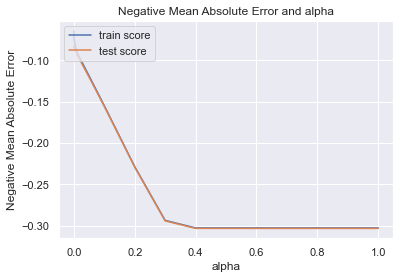

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter, but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [97]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_


array([-7.01112187e-03,  1.38464558e-02,  1.53225544e-02,  1.12197383e-01,
        4.96333243e-02,  0.00000000e+00,  3.45456927e-02,  0.00000000e+00,
        4.15558604e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.24811340e-01,  9.71834566e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -8.00434972e-03,  2.37249538e-02,
        3.39927281e-02,  9.62162070e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.40874116e-03,  0.00000000e+00, -1.18884319e-06,
       -9.54267237e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

### As seen above the advantage of this technique is Lasso brings the coefficients of insignificant features to zero

In [98]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.003),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.014),
 ('LotArea', 0.015),
 ('OverallQual', 0.112),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('AgeProp', -0.095),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_C

In [99]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8854652292252836
0.8895208679915934


In [100]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1257015106967244


####  The R2 values for Train and Test matches well, indicating an optimum model

In [101]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [103]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.003
1   MSSubClass  -0.007
2  LotFrontage   0.014
3      LotArea   0.015
4  OverallQual   0.112

In [104]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0           constant  12.003
13         GrLivArea   0.125
4        OverallQual   0.112
5        OverallCond   0.050
9        TotalBsmtSF   0.042
..               ...     ...
87   BldgType_Duplex  -0.000
193   KitchenQual_TA  -0.007
1         MSSubClass  -0.007
19      KitchenAbvGr  -0.008
29           AgeProp  -0.095

[248 rows x 2 columns]

In [105]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0          constant  12.003
13        GrLivArea   0.125
4       OverallQual   0.112
5       OverallCond   0.050
9       TotalBsmtSF   0.042
7        BsmtFinSF1   0.035
21       GarageArea   0.034
20       Fireplaces   0.024
3           LotArea   0.015
2       LotFrontage   0.014
14     BsmtFullBath   0.010
22       WoodDeckSF   0.010
26      ScreenPorch   0.005
193  KitchenQual_TA  -0.007
1        MSSubClass  -0.007
19     KitchenAbvGr  -0.008
29          AgeProp  -0.095

In [106]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(17, 2)

In [107]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'AgeProp']


In [108]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [109]:
X_train_lasso.shape

(1000, 15)

In [110]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.495702      1.073876   
335     1.881258    2.151725  17.009026     0.729276      2.969732   
200    -1.026482   -0.988037  -0.190859     0.484280     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.005711     -0.821980   
1003   -1.026482   -0.988037   0.134598     0.484280     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

### 2. Ridge Regression

In [111]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.023645      0.011944         0.005593        0.000799      0.0001   
1       0.016785      0.003184         0.007392        0.001356       0.001   
2       0.015587      0.001356         0.007190        0.001468        0.01   
3       0.017783      0.005031         0.006394        0.001854        0.05   
4       0.015785      0.002636         0.005394        0.000489         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.102132          -0.083435          -0.094428   
1   {'alpha': 0.001}          -0.102032          -0.083383          -0.094281   
2    {'alpha': 0.01}          -0.101112          -0.083095          -0.093211   
3    {'alpha': 0.05}          -0.098219          -0.082639          -0.091038   
4     {'alpha': 0.1}          -0.095899          -0.082382          -0.090283   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.095615  ...        -0.093069        0.006236               27   
1          -0.095719  ...        -0.093024        0.006228               26   
2          -0.095897  ...        -0.092554        0.006065               25   
3          -0.094752  ...        -0.091054        0.005324               23   
4          -0.093228  ...        -0.089945        0.004639               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.061446           -0.062926           -0.060016   
1           -0.061449           -0.062940           -0.060028   
2           -0.061474           -0.063023           -0.060135   
3           -0.061568           -0.063146           -0.060537   
4           -0.061686           -0.063262           -0.060858   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.060419           -0.061504         -0.061262         0.001012  
1           -0.060420           -0.061517         -0.061271         0.001015  
2           -0.060502           -0.061617         -0.061350         0.001008  
3           -0.060780           -0.061910         -0.061588         0.000926  
4           -0.061071           -0.062176         -0.061811         0.000861  

[5 rows x 21 columns]

In [113]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### As the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [114]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-2.04374933e-02,  8.13030326e-03,  2.29302537e-02,  6.02101913e-02,
        4.85799435e-02, -1.54321206e-03,  3.22660249e-02,  8.28953512e-03,
        2.79825605e-02,  5.11969350e-02,  4.45170552e-02,  5.84703938e-03,
        8.19679230e-02,  1.07803992e-02, -1.56451664e-03,  8.58963046e-03,
        1.21325989e-02, -1.50095350e-04, -6.67583989e-03,  2.90839461e-03,
        1.83211957e-02,  1.33170911e-02, -1.51181481e-03,  1.14750667e-02,
        4.74478431e-03,  1.32745704e-02,  9.21575993e-03,  2.14131573e-06,
       -6.83766037e-02,  1.57860484e-01,  1.06236469e-01,  1.33457577e-01,
        1.00789538e-01, -1.78489610e-02, -5.04980815e-03, -4.51487028e-04,
       -2.83967759e-02, -1.29926222e-03,  1.62560238e-02, -1.62384452e-02,
        6.34472430e-03,  1.30296106e-02, -2.23796011e-02, -4.35893098e-02,
       -2.34435089e-02,  1.60171462e-02, -3.70166929e-02, -8.36441049e-03,
       -2.14636040e-02,  1.75627786e-02,  3.30555917e-02, -7.02551725e-03,
        1.14777888e-01, -

In [115]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.591),
 ('MSSubClass', -0.02),
 ('LotFrontage', 0.008),
 ('LotArea', 0.023),
 ('OverallQual', 0.06),
 ('OverallCond', 0.049),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.028),
 ('1stFlrSF', 0.051),
 ('2ndFlrSF', 0.045),
 ('LowQualFinSF', 0.006),
 ('GrLivArea', 0.082),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', -0.002),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.018),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.009),
 ('MiscVal', 0.0),
 ('AgeProp', -0.068),
 ('MSZoning_FV', 0.158),
 ('MSZoning_RH', 0.106),
 ('MSZoning_RL', 0.133),
 ('MSZoning_RM', 0.101),
 ('Alley_Pave', -0.018),
 ('Alley_none', -0.005),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.028),
 ('LotShape_Reg', -0.001),
 ('LandContour_HLS', 0.016),
 ('LandContour_Low', -0.

In [116]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9413472272166697
0.908473021589939


In [117]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11441288399662587


### From the analysis we can conclude that Ridge Regression is having better model performance than lasso regression as here the train and test scores are matching well.

In [118]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [119]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.591
30             MSZoning_FV   0.158
32             MSZoning_RL   0.133
53    Neighborhood_Crawfor   0.115
31             MSZoning_RH   0.106
33             MSZoning_RM   0.101
247  SaleCondition_Partial   0.093
69    Neighborhood_StoneBr   0.091
13               GrLivArea   0.082
246   SaleCondition_Normal   0.077
73         Condition1_Norm   0.072
110    Exterior1st_BrkFace   0.072
178           Heating_GasW   0.071
199         Functional_Typ   0.070
235           SaleType_CWD   0.062
243  SaleCondition_AdjLand   0.060
4              OverallQual   0.060
237         SaleType_ConLD   0.059
107       RoofMatl_WdShngl   0.058
77         Condition1_RRAn   0.057

In [120]:
# Sorting the coefficients in descending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.591
30            MSZoning_FV   0.158
32            MSZoning_RL   0.133
53   Neighborhood_Crawfor   0.115
31            MSZoning_RH   0.106
..                    ...     ...
56    Neighborhood_IDOTRR  -0.082
92      HouseStyle_2.5Fin  -0.098
179          Heating_Grav  -0.107
194       Functional_Maj2  -0.110
57   Neighborhood_MeadowV  -0.117

[248 rows x 2 columns]

In [121]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.591
30            MSZoning_FV   0.158
32            MSZoning_RL   0.133
53   Neighborhood_Crawfor   0.115
31            MSZoning_RH   0.106
..                    ...     ...
56    Neighborhood_IDOTRR  -0.082
92      HouseStyle_2.5Fin  -0.098
179          Heating_Grav  -0.107
194       Functional_Maj2  -0.110
57   Neighborhood_MeadowV  -0.117

[237 rows x 2 columns]

In [122]:
predRFE.shape

(237, 2)

### Inference:
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.
Equation can be formulated using the features and coefficients obtained by Lasso

In [123]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

Variable   Coeff
C          constant  12.003
x1        GrLivArea   0.125
x2      OverallQual   0.112
x3      OverallCond   0.050
x4      TotalBsmtSF   0.042
x5       BsmtFinSF1   0.035
x6       GarageArea   0.034
x7       Fireplaces   0.024
x8          LotArea   0.015
x9      LotFrontage   0.014
x10    BsmtFullBath   0.010
x11      WoodDeckSF   0.010
x12     ScreenPorch   0.005
x13  KitchenQual_TA  -0.007
x14      MSSubClass  -0.007
x15    KitchenAbvGr  -0.008
x16         AgeProp  -0.095

### These are the final features that should be selected for predicting the price of house
### Hence the equation:
### Log(Y) = C + 0.125(x1) + 0.112(x2) + 0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) + 0.015(x8) + 0.014(x9) + 0.010(x10) + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)

## CONCLUSION
### Suggestions for Price Housing is to keep a check on these predictors affecting the price of the house.
### The higher values of positive coeeficients suggest a high sale value.
### Some of those features are:-
### 1. GrLivArea
### 2. OverallQual
### 3. OverallCond
### 4. TotalBsmtSF
### 5.GarageArea

### The higher values of negative coeeficients suggest a decrease in sale value.
### Some of those features are:-
### 1. PropAge	
### 2. MSSubClass

### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
